In [1]:
from google.colab import files, drive

upload = files.upload()

Saving insurance_part_data.csv to insurance_part_data.csv


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
insurance_df = pd.read_csv("insurance_part_data.csv")
insurance_df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [4]:
# Retrieving info of the columns of insurance_df

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
# Check for any missing values in insurance_df

insurance_df.isna().sum()

,0
Age,0
Agency_Code,0
Type,0
Claimed,0
Commision,0
Channel,0
Duration,0
Sales,0
Product Name,0
Destination,0


In [6]:
# Check for presence of duplicate rows in insurance_df

insurance_df[insurance_df.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [7]:
# Drop duplicate rows

insurance_df.drop_duplicates(inplace = True)

In [9]:
print(f"Claimed status of insurance_df: \n{insurance_df['Claimed'].value_counts()}\n")
print(f"Claimed status of insurance_df: \n{insurance_df['Claimed'].value_counts(normalize = True)}\n")

Claimed status of insurance_df: 
Claimed
No     1947
Yes     914
Name: count, dtype: int64

Claimed status of insurance_df: 
Claimed
No     0.680531
Yes    0.319469
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Claimed status in insurance_df')

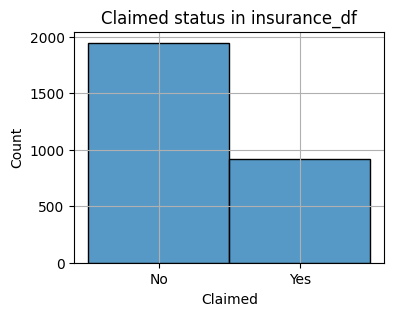

In [10]:
plt.figure(figsize = (4, 3))
sns.histplot(x = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Claimed status in insurance_df")

* The dataset reveals a notable class imbalance in insurance claims, with 68% of instances (1944 out of 2858) classified as "No" (not claimed) and 32% (914 instances) as "Yes" (claimed).

In [11]:
print(f"Number of unique age in insurance_df: {insurance_df['Age'].nunique()}\n")
print(f"Unique age in insurance_df: {insurance_df['Age'].unique()}\n")
print(f"Count of each age in insurance_df:{insurance_df['Age'].value_counts()}\n")

Number of unique age in insurance_df: 70

Unique age in insurance_df: [48 36 39 33 45 61 37 43 52 31 23 29 28 27 44 46 25 60 30 40 32 26 38 42
 51 24 59 41 56 35 58 73 47 50 22 20 53 68 34 79 19 21 66 69 57 63 54 64
 71 49 62 84 17 55 76 72 65 67 75 70 18 77 14 81 74  8 16 83 15 11]

Count of each age in insurance_df:Age
36    880
31    124
48    107
30     91
35     91
     ... 
14      1
8       1
83      1
15      1
11      1
Name: count, Length: 70, dtype: int64



Text(0.5, 1.0, 'Histplot for the age of insured in insurance_df')

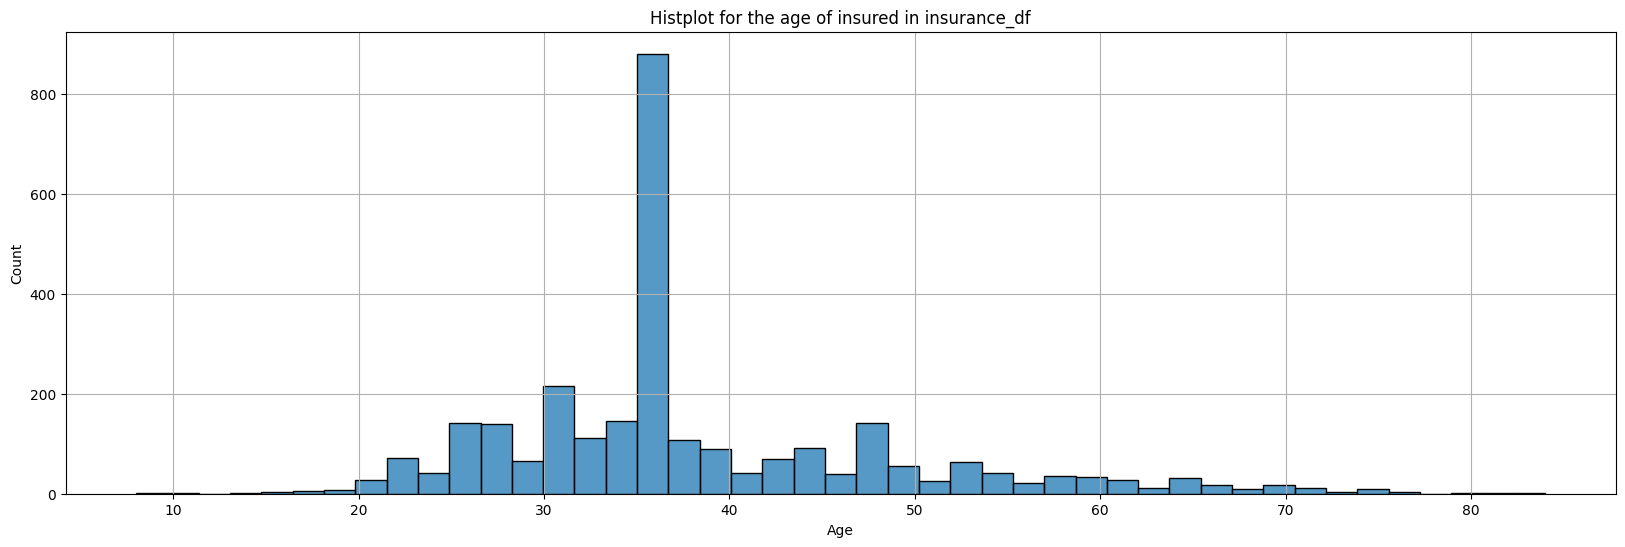

In [12]:
plt.figure(figsize=(20, 6))
sns.histplot(x = 'Age', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot for the age of insured in insurance_df")

* The age of insured individuals spans a wide range (from 8 to 84 years), with a significant concentration around age 36 (880 instances).
This suggests a specific demographic dominates the customer base, which may influence claim patterns.

Text(0.5, 1.0, 'Histplot for the age of insured in insurance_df')

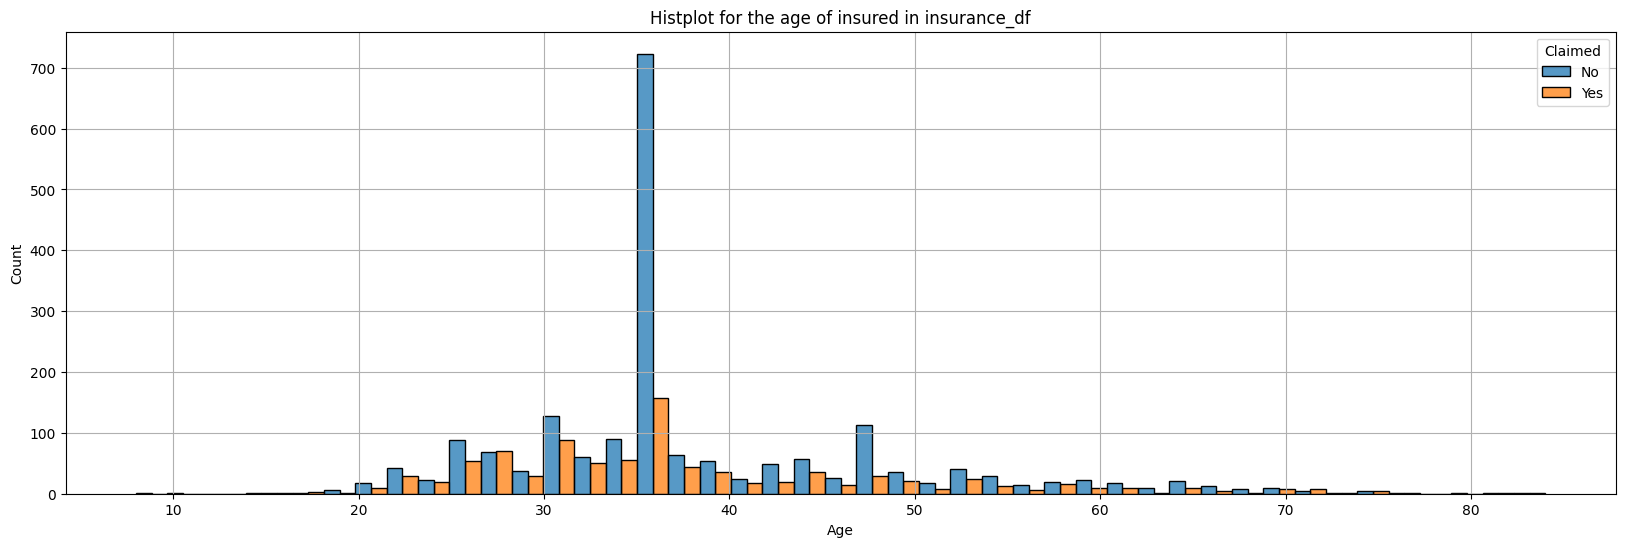

In [13]:
plt.figure(figsize=(20, 6))
sns.histplot(x = 'Age', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.grid(visible = True)
plt.title("Histplot for the age of insured in insurance_df")


Text(0.5, 1.0, 'Scatterplot illustrating the distribution of the age of insured in insurance_df along with its claimed status')

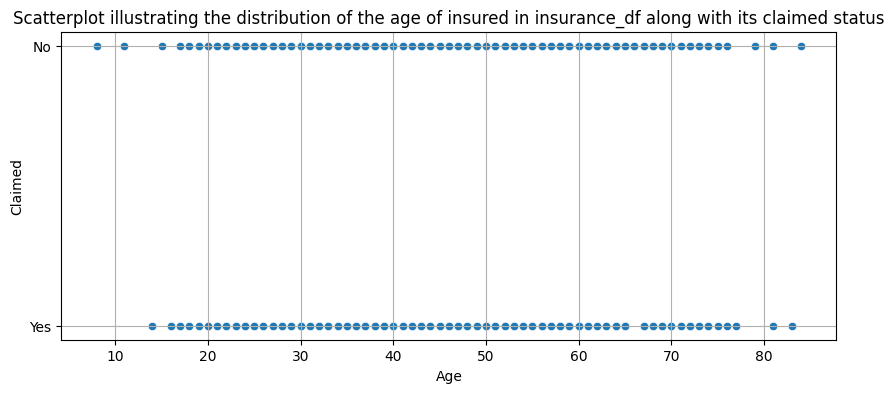

In [14]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x = 'Age', y = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Scatterplot illustrating the distribution of the age of insured in insurance_df along with its claimed status")

* Histograms and scatterplots reveal that claim likelihood does not strongly correlate with age alone, though certain age groups (e.g., around 36) show higher claim frequencies due to their larger representation in the dataset.

In [15]:
print(f"Distribution of commission in terms of count in insurance_df:{insurance_df['Commision'].value_counts()}\n")

Distribution of commission in terms of count in insurance_df:Commision
0.00     1239
23.76      61
63.21      59
54.00      59
17.82      57
         ... 
41.25       1
13.75       1
12.00       1
71.85       1
13.50       1
Name: count, Length: 324, dtype: int64



Text(0.5, 1.0, 'Histplot illustrating the distribution the commission received for tour insurance in insurance_df')

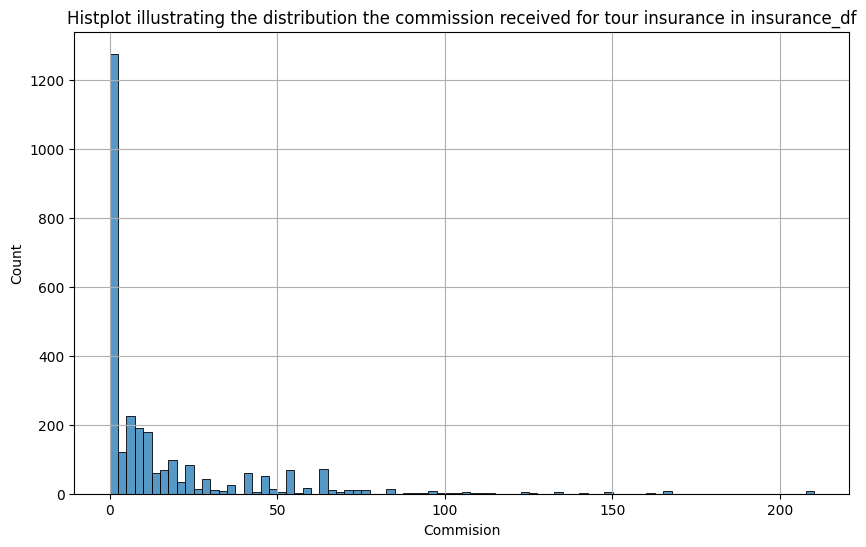

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Commision', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot illustrating the distribution the commission received for tour insurance in insurance_df")

* Commission values show a high frequency of zero (1239 instances), indicating many policies may be sold without commission.

Text(0.5, 1.0, 'Scatterplot illustrating the distribution of commission received for tour insurance along with its claimed status')

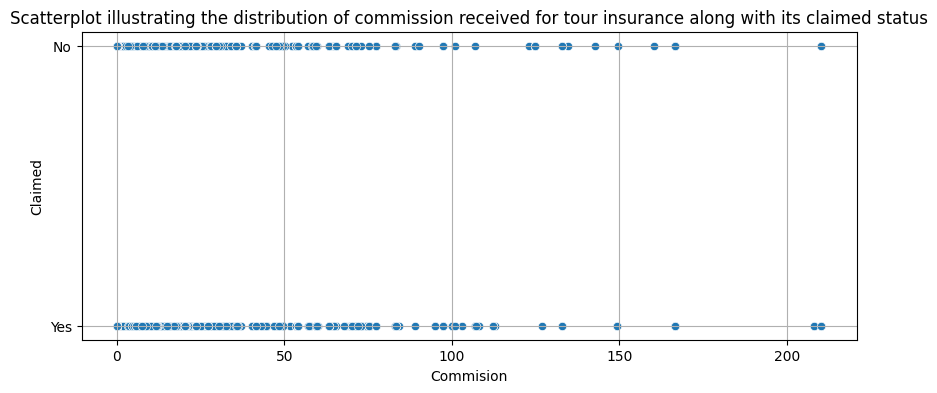

In [17]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x = 'Commision', y = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Scatterplot illustrating the distribution of commission received for tour insurance along with its claimed status")

Text(0.5, 1.0, 'Displot illustrating the distribution of commission received for tour insurance along with its claimed status')

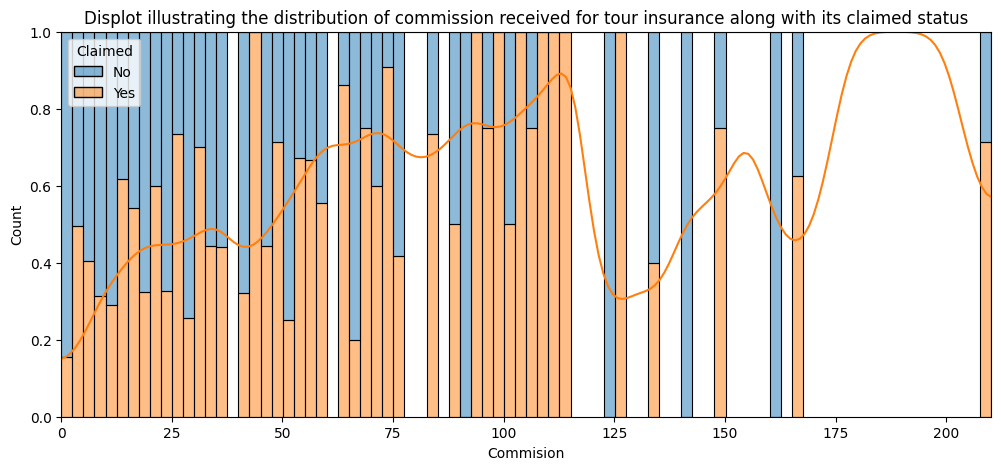

In [18]:
plt.figure(figsize=(12, 5))
sns.histplot(x = 'Commision', data = insurance_df, hue = 'Claimed', kde = True, multiple = 'fill')
plt.title("Displot illustrating the distribution of commission received for tour insurance along with its claimed status")

* Scatterplots and distribution plots suggest no clear linear relationship between commission amounts and claim status, though lower commission policies often align with non-claimed instances.

In [19]:
# Sales by agency

total_sales_by_agency = insurance_df.groupby('Agency_Code')['Sales'].sum()
total_sales_by_agency = total_sales_by_agency.reset_index()
total_sales_by_agency

,Agency_Code,Sales
0,C2B,86191.85
1,CWT,31496.55
2,EPX,50350.02
3,JZI,8650.87


* Four agencies dominate total sales, with C2B (86067) leading followed by EPX (50350.02), CWT (31496.55 )& JZI (8632.87).

Text(0.5, 1.0, 'Histplot illustrating the distribution of sales in insurance_df')

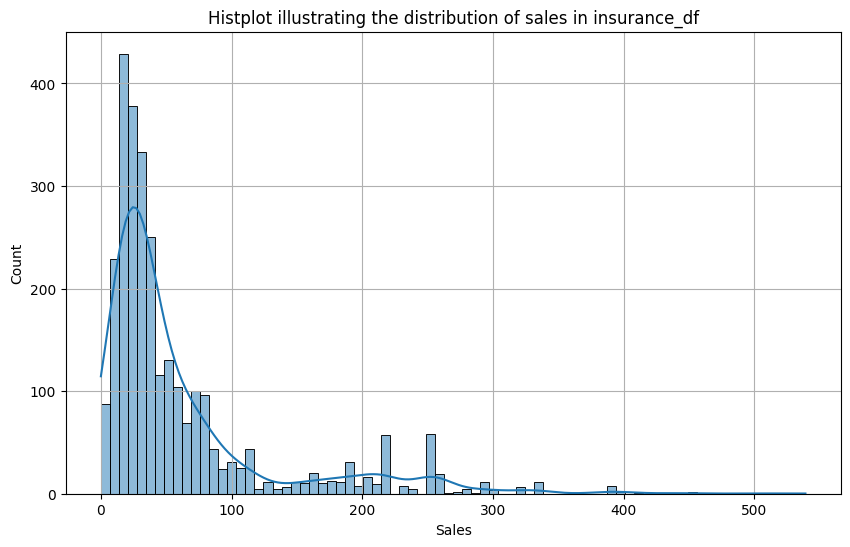

In [20]:
plt.figure(figsize = (10, 6))
sns.histplot(x = 'Sales', data = insurance_df, kde = True)
plt.grid(visible = True)
plt.title('Histplot illustrating the distribution of sales in insurance_df')

* Sales distribution highlights varied policy values with potential outliers

Text(0.5, 1.0, 'Histplot illustrating the distribution of sales for both claimed and unclaimed in insurance_df')

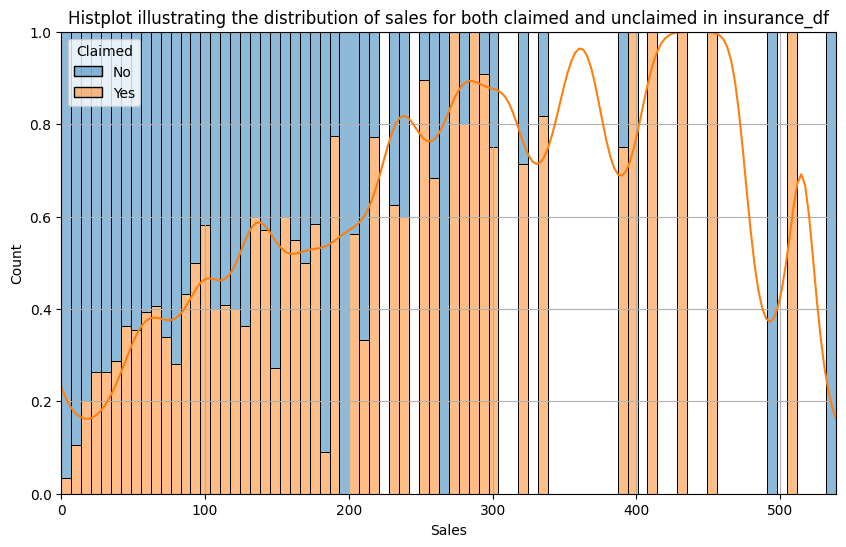

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(x = 'Sales', data = insurance_df, hue = 'Claimed', kde = True, multiple = 'fill')
plt.grid(visible = True)
plt.title('Histplot illustrating the distribution of sales for both claimed and unclaimed in insurance_df')

* Higher sales values appear to have a slight association with claimed status in histograms with KDE overlays, hinting that more expensive policies might be more likely to result in claims.

In [22]:
print(f"Number of tour durations in insurance_df: {insurance_df['Duration'].nunique()}\n")
print(f"Duration and number of tours for the said duration in insurance_df:{insurance_df['Duration'].value_counts()}\n")

Number of tour durations in insurance_df: 257

Duration and number of tours for the said duration in insurance_df:Duration
10     78
6      77
11     77
9      75
8      71
       ..
417     1
197     1
142     1
222     1
416     1
Name: count, Length: 257, dtype: int64



Text(0.5, 1.0, 'Histplot for the no of tours for each duration type in insurance_df')

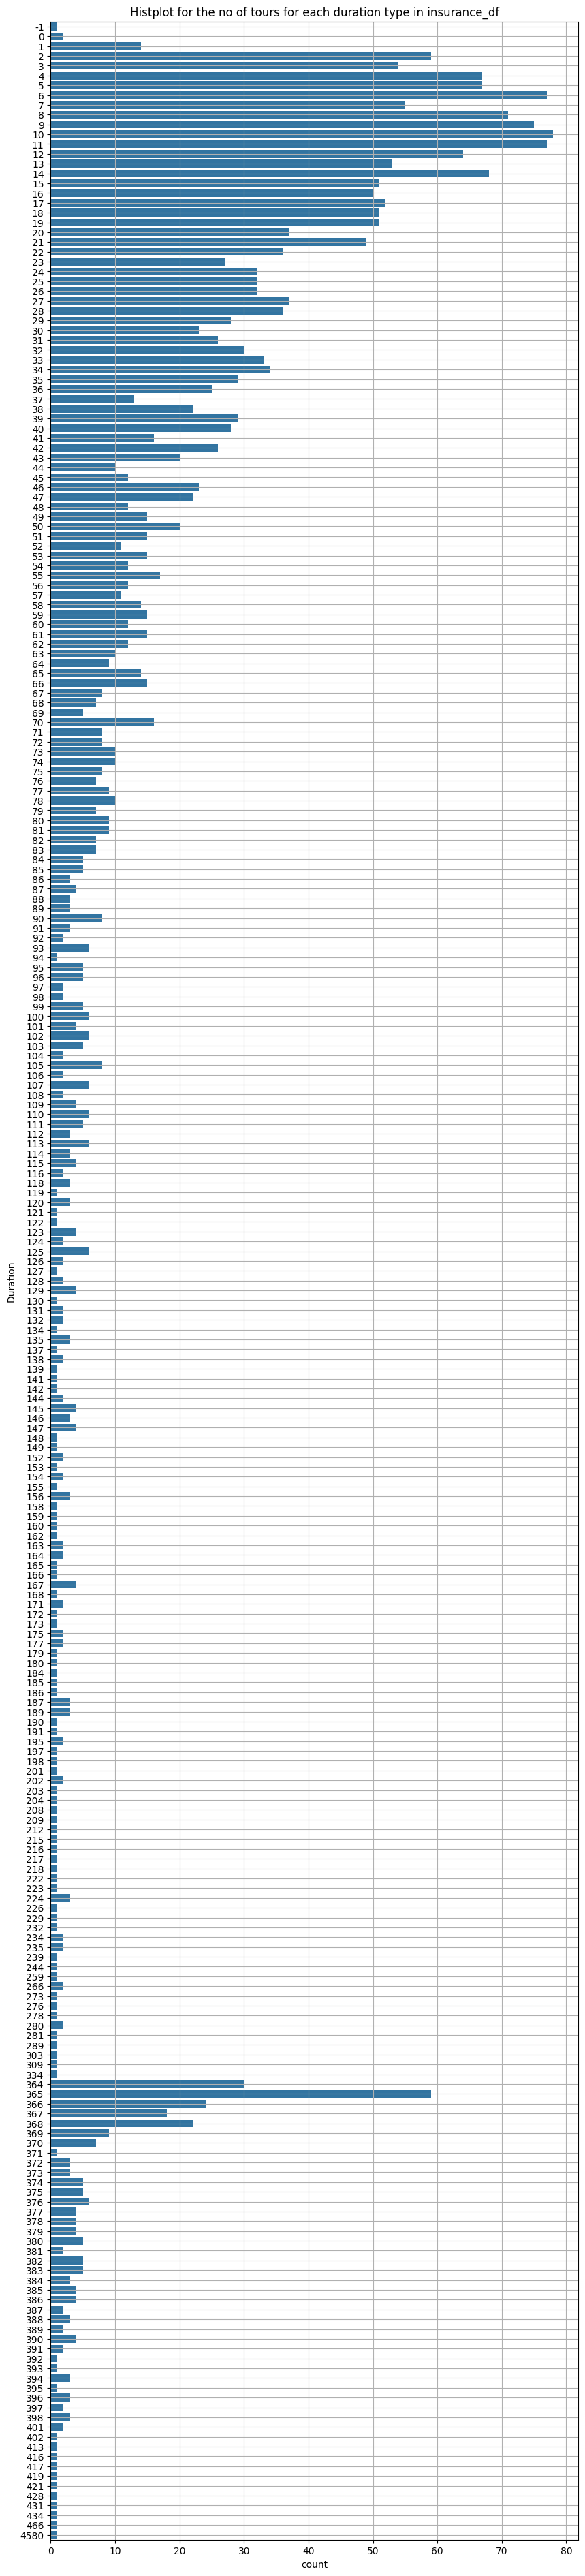

In [23]:
plt.figure(figsize=(10, 48))
sns.countplot(y = 'Duration', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each duration type in insurance_df")

* Tour durations vary widely (255 unique values), with shorter durations like 10 days (78 instances) being more common.
This variability suggests diverse travel plans among customers.

Text(0.5, 1.0, 'Histplot for the no of tours for each duration type along with insurance claimed status in insurance_df')

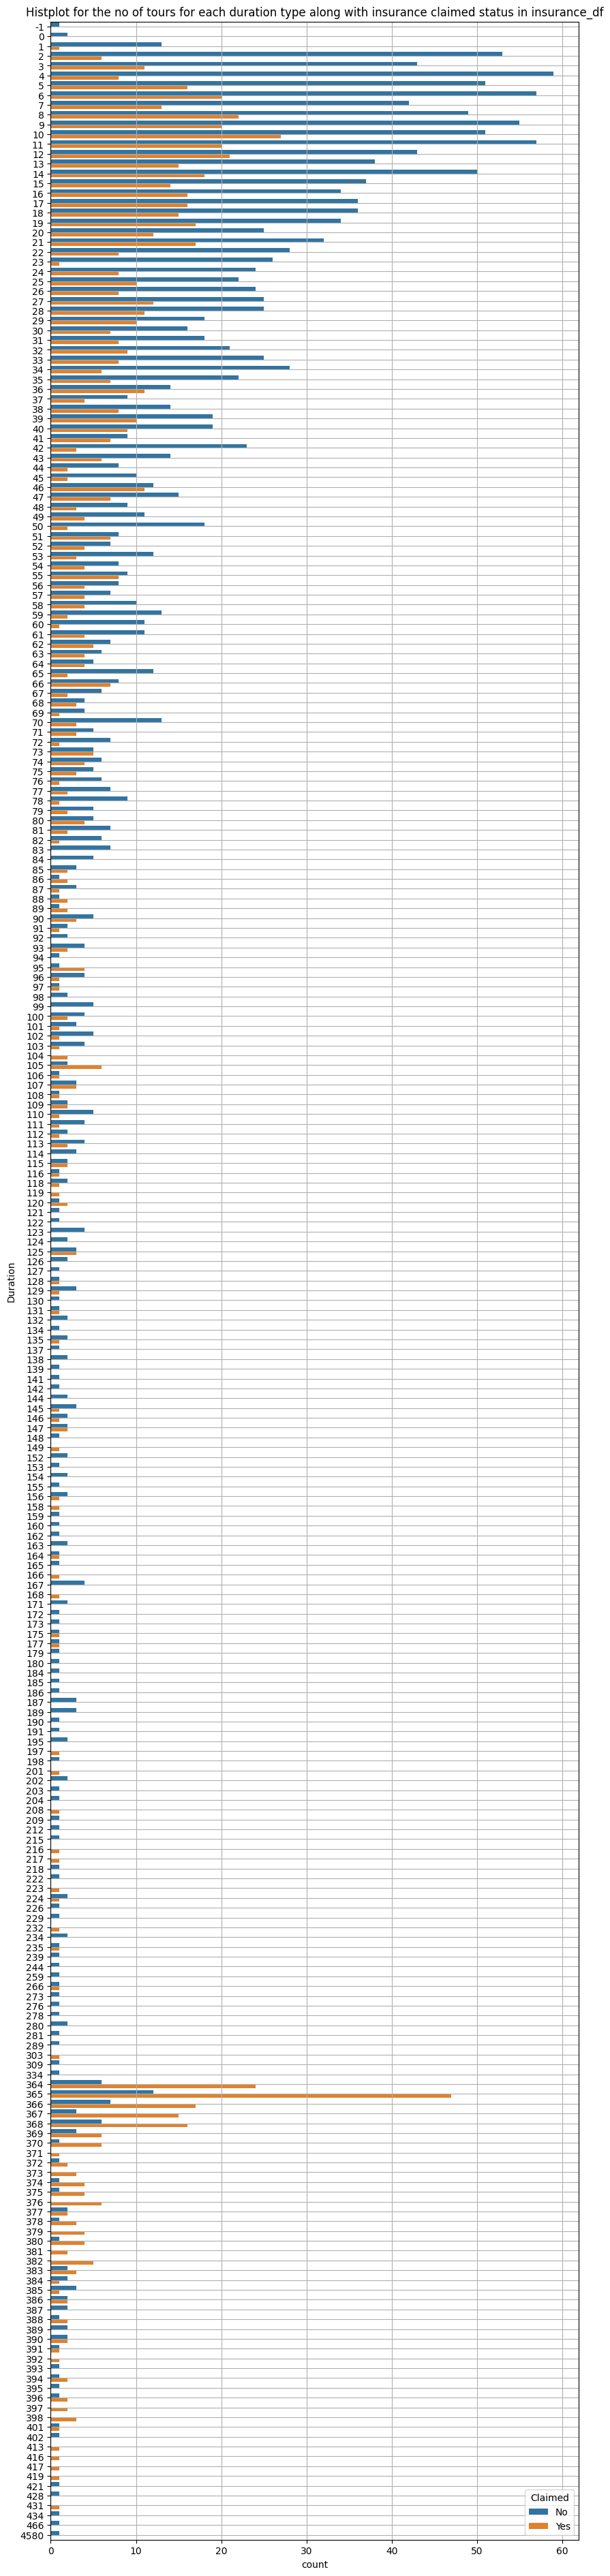

In [24]:
plt.figure(figsize=(10, 48))
sns.countplot(y = 'Duration', data = insurance_df, hue = 'Claimed')
plt.ylabel('Duration')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each duration type along with insurance claimed status in insurance_df")

In [25]:
print(f"Number of tour firm selling tour insurance in insurance_df: {insurance_df['Agency_Code'].nunique()}\n")
print(f"Number of insurance sold by each tour firm in insurance_df:{insurance_df['Agency_Code'].value_counts()}\n")

Number of tour firm selling tour insurance in insurance_df: 4

Number of insurance sold by each tour firm in insurance_df:Agency_Code
EPX    1238
C2B     913
CWT     471
JZI     239
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of insurance sold by each tour firm in insurance_df')

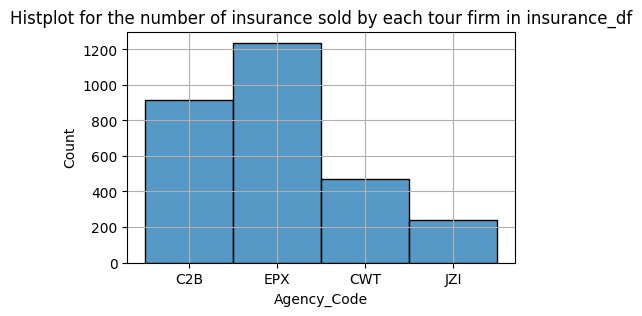

In [26]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Agency_Code', data = insurance_df)
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot for the number of insurance sold by each tour firm in insurance_df")

* Four agencies dominate sales, with EPX selling the most (1238 policies), and five product types exist, with the Customized Plan leading (1070 instances) indicating a preference for certain agencies and products.

Text(0.5, 1.0, 'Histplot for the number of insurance sold by each tour firms along with the number of insurance claimed in insurance_df')

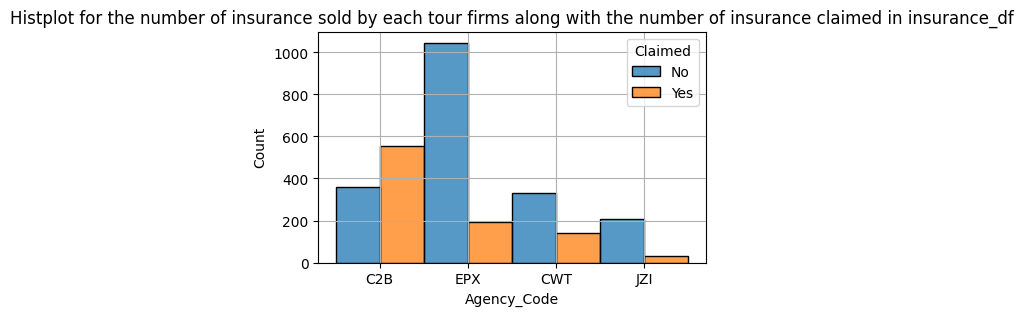

In [27]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot for the number of insurance sold by each tour firms along with the number of insurance claimed in insurance_df")

* Agency C2B show higher claims, but the proportion of claims varies across agencies, indicating agency-specific risk profiles or customer behaviors.

Text(0.5, 1.0, 'Histplot illustrating the type of tour insurance being sold by each tour firm in insurance_df')

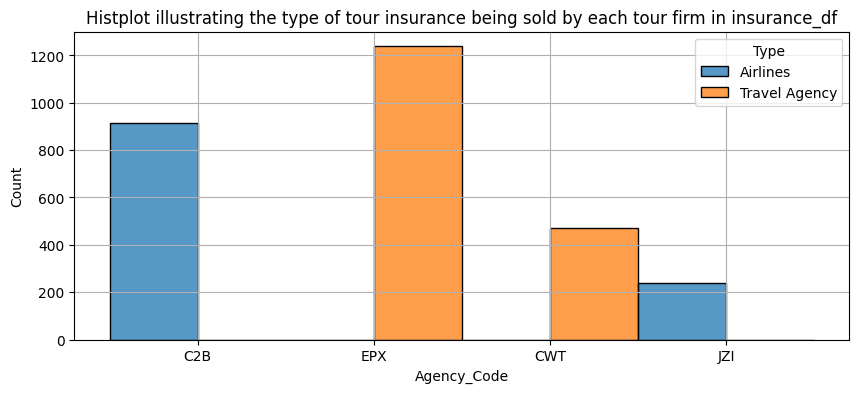

In [28]:
plt.figure(figsize=(10, 4))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot illustrating the type of tour insurance being sold by each tour firm in insurance_df")

* Agencies like C2B & JZI are Airlines whereas agencies like EPX & CWT are Travel Agency.

Text(0.5, 1.0, 'Histplot illustrating the number of tour insurance sold by each agency through different channels in insurance_df')

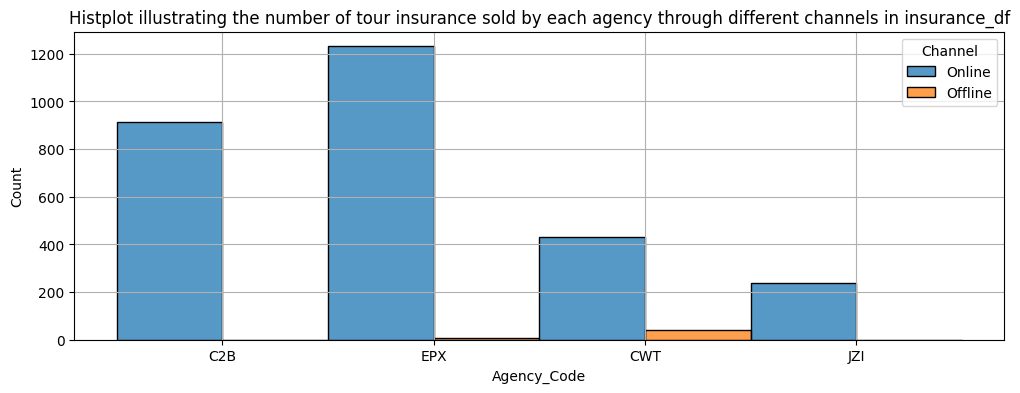

In [29]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Channel', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of tour insurance sold by each agency through different channels in insurance_df")

* C2B & JZI sold insurance online.
* EPX & CWT sold the vast majority of insurance is sold online followed by offline.

In [30]:
print(f"Type of tour insurance firms in insurance_df: {insurance_df['Type'].nunique()}\n")
print(f"Number of tours conducted by each type of tour insurance firm in insurance_df:{insurance_df['Type'].value_counts()}\n")

Type of tour insurance firms in insurance_df: 2

Number of tours conducted by each type of tour insurance firm in insurance_df:Type
Travel Agency    1709
Airlines         1152
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the no of tours for each type of tour insurance firms in insurance_df')

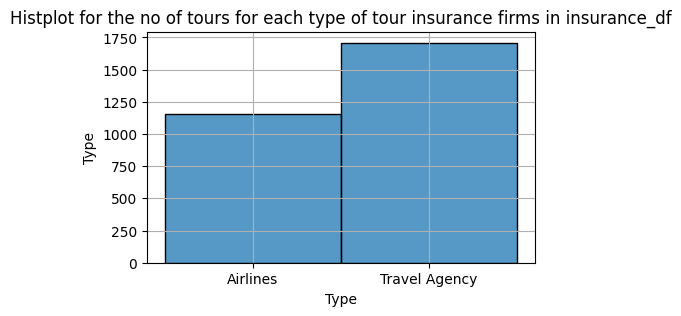

In [31]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Type', data = insurance_df, )
plt.ylabel('Type')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each type of tour insurance firms in insurance_df")

* Travel Agencies (1709 instances) sell more through online channels compared to Airlines (1149 instances), with specific agencies like EPX heavily favoring online sales. This interaction highlights channel preferences based on agency type.

Text(0.5, 1.0, 'Histplot for the no of tours for each type of tour insurance firms along with insurance claimed status in insurance_df')

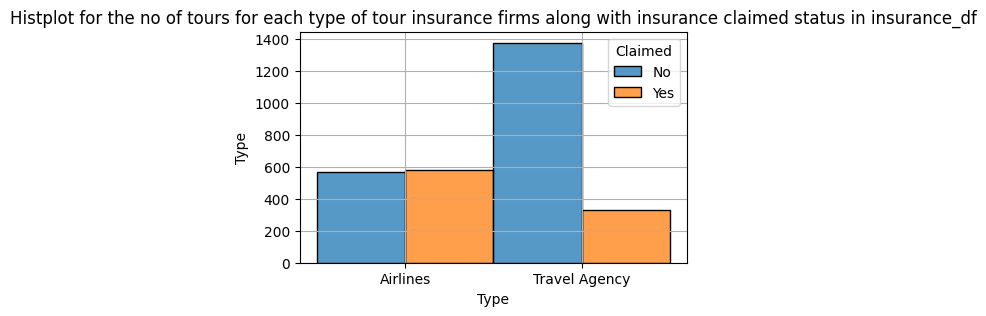

In [32]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Type', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.ylabel('Type')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each type of tour insurance firms along with insurance claimed status in insurance_df")

In [33]:
# Distribution channel of tour insurance agencies (Channel) Distibution channel

print(f"Number of channels through which the insurance firm is providing tour insurance: {insurance_df['Channel'].nunique()}\n")
print(f"Number of insurance bought through each channel: \n{insurance_df['Channel'].value_counts()}\n")

Number of channels through which the insurance firm is providing tour insurance: 2

Number of insurance bought through each channel: 
Channel
Online     2815
Offline      46
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot illustrating the number of insurance bought through each channel in insurance_df')

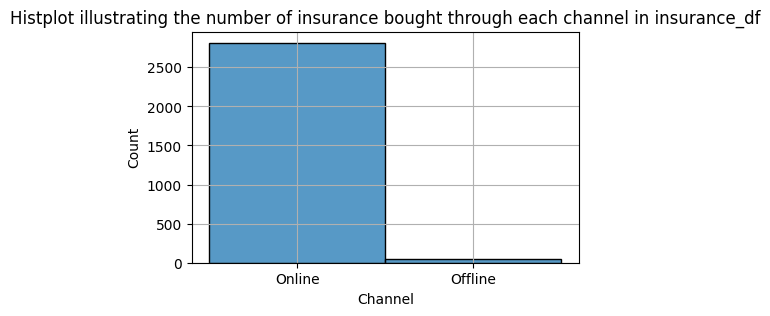

In [34]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Channel', data = insurance_df)
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of insurance bought through each channel in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating number of insurance sold by each tour firm through different channels in insurance_df')

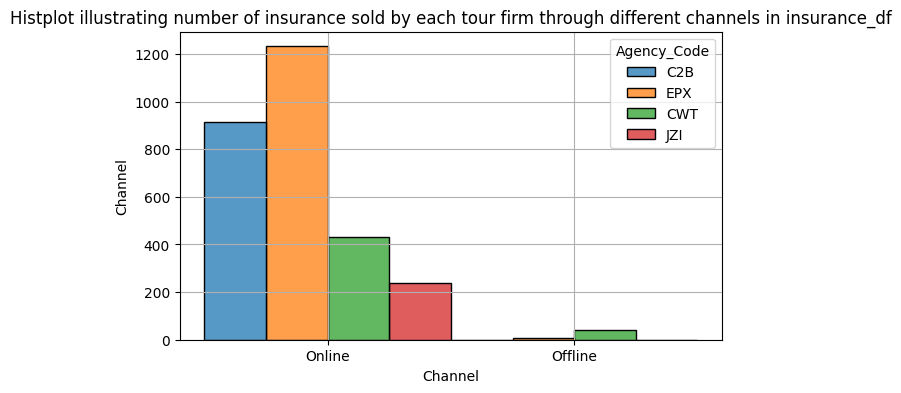

In [35]:
plt.figure(figsize=(7, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.ylabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating number of insurance sold by each tour firm through different channels in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the type of tour insurance firm and number of insurance sold by them through different channels in insurance_df')

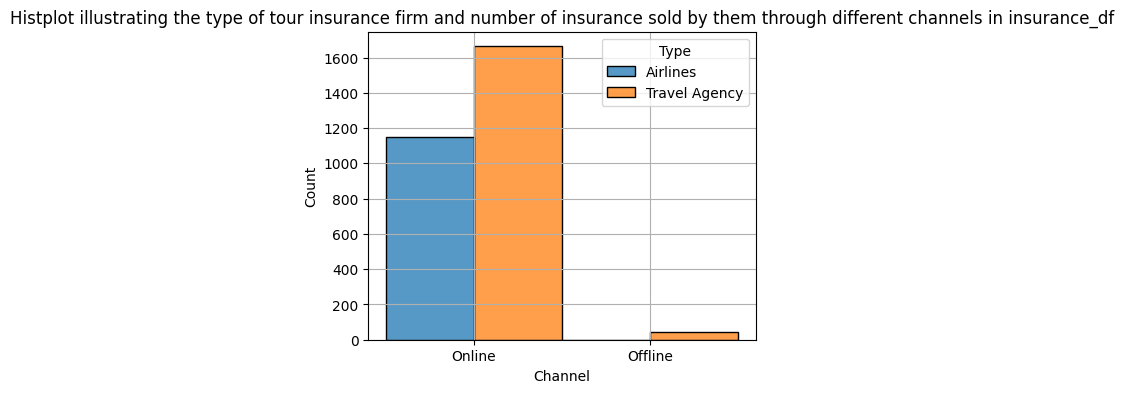

In [36]:
plt.figure(figsize=(5, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the type of tour insurance firm and number of insurance sold by them through different channels in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the number of insurance bought through each channel with claimed status in insurance_df')

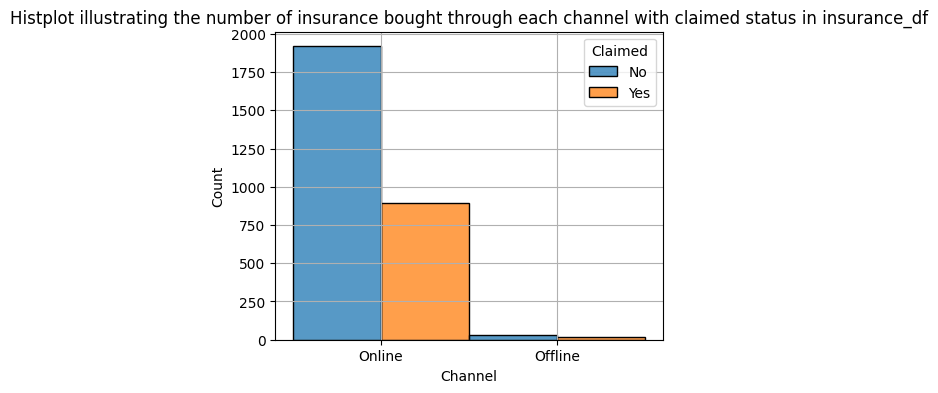

In [37]:
plt.figure(figsize=(5, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of insurance bought through each channel with claimed status in insurance_df")

* The vast majority of insurance is sold online (2812 instances) compared to offline (46 instances), with online channels showing a slightly higher proportion of claims, possibly due to volume.

In [38]:
# Name of the tour insurance products (Product)

print(f"Number of products sold by tour insurance firms: {insurance_df['Product Name'].nunique()}\n")
print(f"Sales of each product:\n{insurance_df['Product Name'].value_counts()}\n")

Number of products sold by tour insurance firms: 5

Sales of each product:
Product Name
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products in insurance_df')

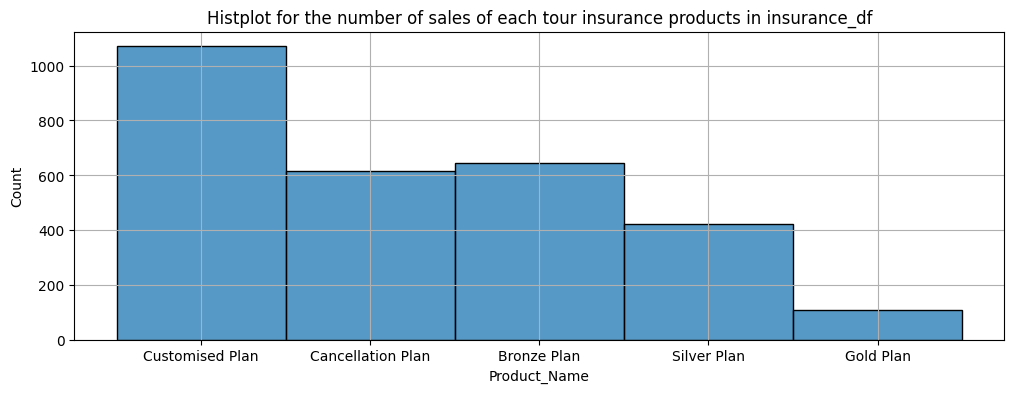

In [39]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Product Name', data = insurance_df)
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products in insurance_df")

* Among the various products, Customised Plan were most sold followed by Bronze Plan, Cancellation Plan, Silver Plan & Gold Plan



Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products by each tour agency in insurance_df')

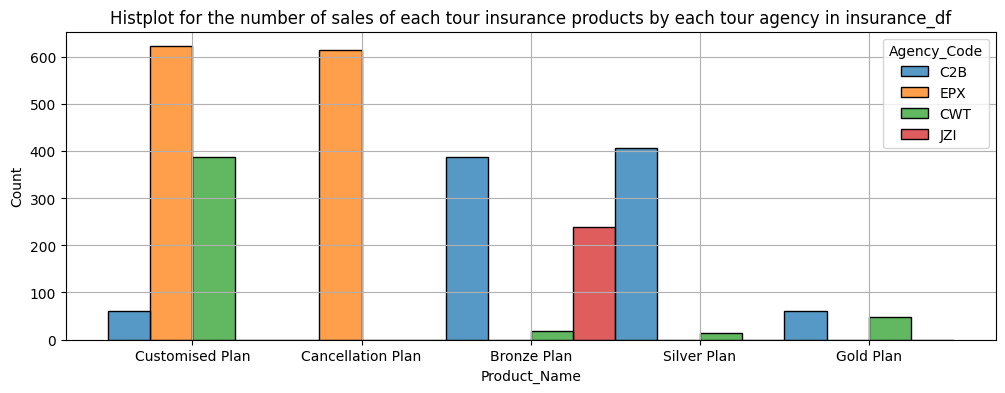

In [40]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products by each tour agency in insurance_df")

* Four agencies dominate sales, with EPX selling the most (1238 policies), and five product types exist, with the Customized Plan leading (1070 instances).

* Sales of Customized Plan is dominated by C2B, EPX & CWT.  

* Sales of Cancellation Plan is dominated by EPX.

* Sales of Bronze Plan is dominated by C2B, CWT & JZI.

* Sales of Silver Plan is dominated by C2B & CWT.

* Sales of Gold Plan is dominated by C2B & CWT.

Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products through each distribution channel in insurance_df')

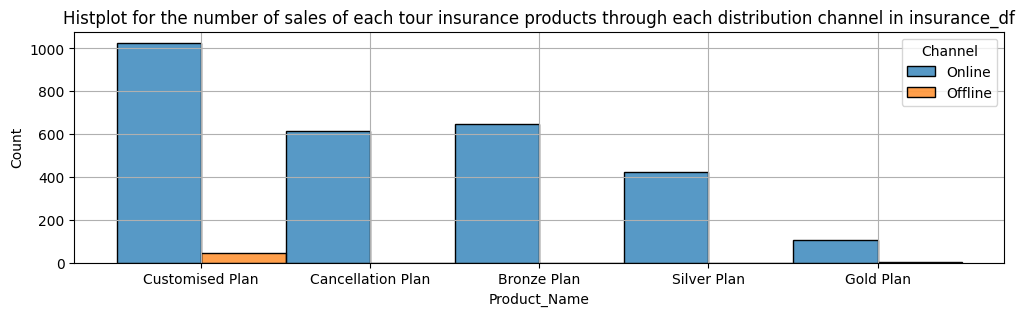

In [41]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Channel', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products through each distribution channel in insurance_df")

* The vast majority of insurance is sold online (2812 instances) compared to offline (46 instances).

Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products by each insurance firm in insurance_df')

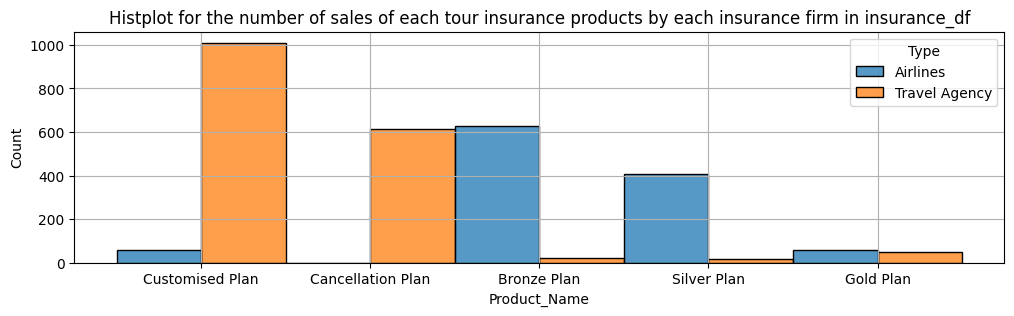

In [42]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products by each insurance firm in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the claimed status for the each tour insurance products sold in insurance_df')

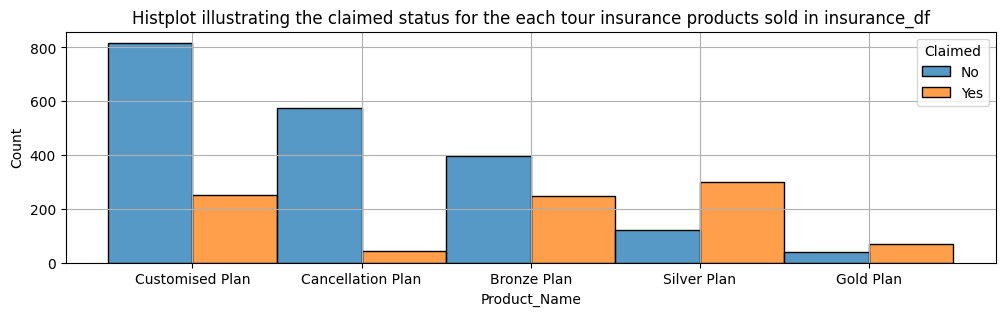

In [43]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot illustrating the claimed status for the each tour insurance products sold in insurance_df")

* Most of the claims came from the Silver Plan followed by Bronze Plan, Customized Plan Gold Plan & Cancellation Plan.

In [44]:
# Destination of the tour (Destination)

print(f"Number of destinations in insurance firms: {insurance_df['Destination'].nunique()}\n")
print(f"Number of tours to each dstinations: \n{insurance_df['Destination'].value_counts()}\n")

Number of destinations in insurance firms: 3

Number of tours to each dstinations: 
Destination
ASIA        2327
Americas     319
EUROPE       215
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of tours to each destination in insurance_df')

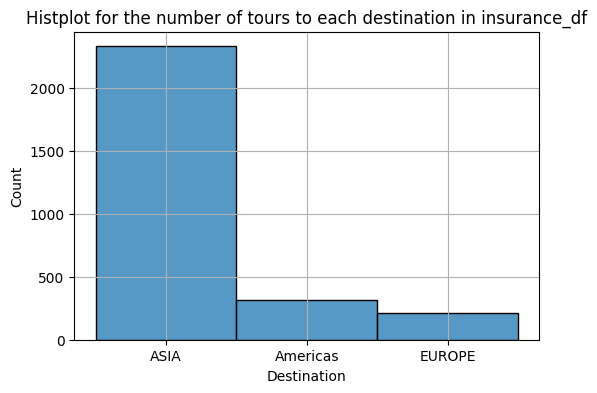

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df)
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination in insurance_df")

* Most of the tour insurance buyers are headed to Asia followed by Americas & Europe

Text(0.5, 1.0, 'Histplot for the number of tours to each destination by each agency in insurance_df')

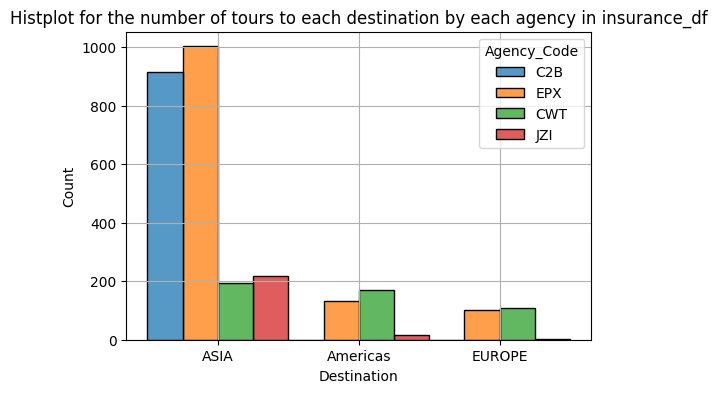

In [46]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination by each agency in insurance_df")

* People travelling to Asia bought their insurance from C2B, EPX, CWT & JZI.
* People travelling to Americas bought their insurance from EPX, CWT & JZI.
* People travelling to Eorope bought their insurance from EPX, CWT & JZI.

Text(0.5, 1.0, 'Histplot for the number of tours to each destination by each agency in insurance_df')

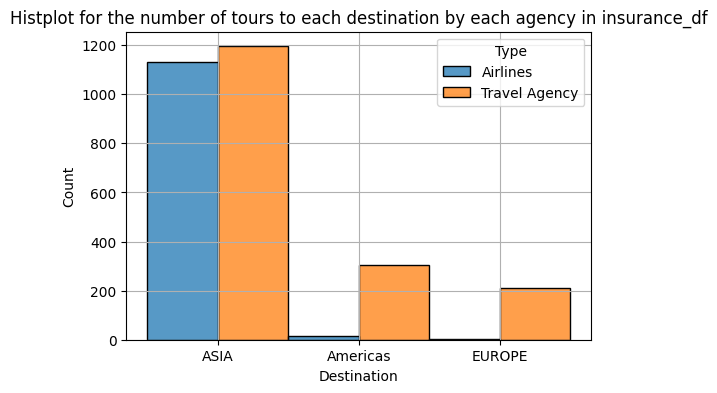

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination by each agency in insurance_df")

* Most people travelling to Asia, Americas & Europe bought their insurance through Travel Agency followed by Airlines

In [48]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [49]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


Text(0.5, 1.0, 'box plot for continuous variables')

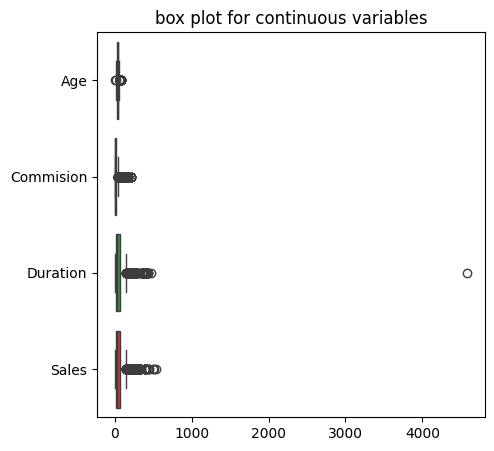

In [50]:
plt.figure(figsize=(5, 5))
sns.boxplot(insurance_df[['Age', 'Commision', 'Duration', 'Sales']], orient = 'h')
plt.title("box plot for continuous variables")

* Age, Commision, Duration & Sales contains outliers

Text(0.5, 1.0, 'Pairplot with all continuous features in insurance_df')

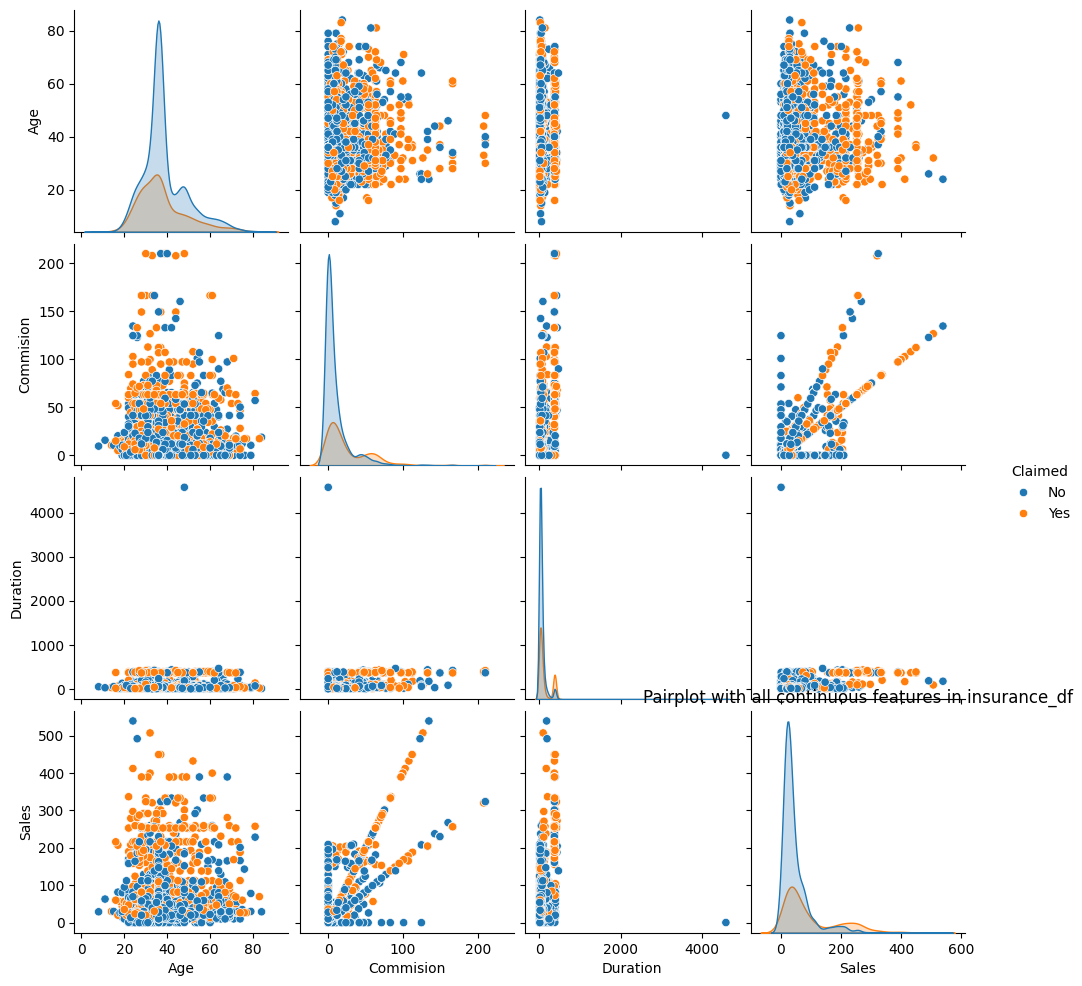

In [51]:
sns.pairplot(insurance_df, hue = 'Claimed')
plt.title("Pairplot with all continuous features in insurance_df")

Text(0.5, 1.0, 'Heatmap illustrating the correlation among the continuous features in insurance_df')

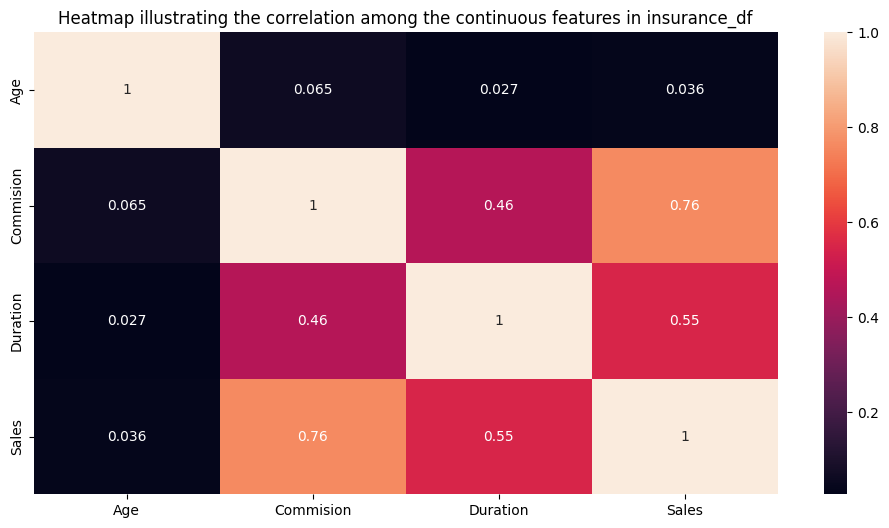

In [52]:
plt.figure(figsize =(12, 6))
sns.heatmap(insurance_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot = True)
plt.title("Heatmap illustrating the correlation among the continuous features in insurance_df")

* A heatmap of continuous variables (Age, Commission, Duration, Sales) shows a moderate positive correlation between Sales and Commission, suggesting that higher policy sales often yield higher commissions.
* Correlations with Age and Duration are weak, indicating limited linear relationships among these variables.


In [53]:
# Converting the object types to categorical types

for feature in insurance_df.columns:
  if insurance_df[feature].dtype == 'object':
    print('feature: ', feature)
    print(pd.Categorical(insurance_df[feature].unique()))
    print(pd.Categorical(insurance_df[feature].unique()).codes)
    insurance_df.loc[:, feature] = pd.Categorical(insurance_df[feature]).codes
    print('\n\n')

insurance_df


feature:  Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]



feature:  Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]



feature:  Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]



feature:  Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]



feature:  Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]



feature:  Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]





,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


In [55]:
# using dictionary to convert specific columns
convert_dict = {'Agency_Code': int,
                'Type': int,
                'Claimed': int,
                'Channel': int,
                'Product Name': int,
                'Destination': int}

insurance_df = insurance_df.astype(convert_dict)
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int64  
 2   Type          2861 non-null   int64  
 3   Claimed       2861 non-null   int64  
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int64  
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int64  
 9   Destination   2861 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 310.4 KB


In [56]:
insurance_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [57]:
# Separating the dependent and independent variables

X = insurance_df.drop('Claimed', axis = 1)
y = insurance_df['Claimed']

In [58]:
# Dividing the dependent and independent variables into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 121)

In [60]:
print('X_train.shape: ', X_train.shape)
_train

X_train.shape:  (2002, 9)


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
2202,36,2,1,0.00,1,22,25.0,1,0
2865,36,2,1,0.00,1,67,25.0,1,0
2083,36,2,1,0.00,1,82,80.0,1,2
366,36,2,1,0.00,1,42,44.0,2,0
2633,36,2,1,0.00,1,72,93.0,2,2
...,...,...,...,...,...,...,...,...,...
341,36,2,1,0.00,1,2,20.0,2,0
1786,83,0,0,17.38,1,21,69.5,3,0
2209,39,1,1,29.00,1,370,204.6,3,0
1693,74,3,0,7.70,1,35,22.0,0,0


In [61]:
print('y_train.shape: ', y_train.shape)
y_train

y_train.shape:  (2002,)


,Claimed
2202,0
2865,0
2083,0
366,1
2633,1
...,...
341,0
1786,1
2209,1
1693,0


In [62]:
print('X_test.shape: ', X_test.shape)
X_test

X_test.shape:  (859, 9)


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
162,36,2,1,0.00,1,2,0.0,2,0
1691,37,0,0,8.38,1,16,33.5,4,0
322,36,2,1,0.00,1,80,32.0,2,0
2593,55,1,1,17.82,1,89,29.7,2,2
2016,40,1,1,41.58,1,38,154.0,2,1
...,...,...,...,...,...,...,...,...,...
580,72,0,0,8.85,1,46,35.4,4,0
2500,36,2,1,0.00,1,10,20.0,2,0
1138,43,0,0,3.38,1,4,13.5,0,0
49,36,3,0,7.70,1,24,22.0,0,0


In [63]:
print('y_test.shape: ', y_test.shape)
y_test

y_test.shape:  (859,)


,Claimed
162,0
1691,0
322,1
2593,1
2016,1
...,...
580,1
2500,0
1138,1
49,0


**Deep Learning Model**

In [64]:
dd_model = Sequential()

# Input
dd_model.add(Dense(512, activation = 'relu', input_dim = X_train.shape[1]))
dd_model.add(Dropout(0.25))

# Hidden
dd_model.add(Dense(256, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(128, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(64, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(32, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(16, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(8, activation = 'relu'))
dd_model.add(Dropout(0.25))

# Output
dd_model.add(Dense(1, activation = 'sigmoid'))

# Compilation
dd_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

dd_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 300, callbacks = early_stop, verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.4207 - val_loss: 0.6846
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7458 - val_loss: 0.6300
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6753 - val_loss: 0.6095
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6694 - val_loss: 0.5940
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6576 - val_loss: 0.5827
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6584 - val_loss: 0.5946
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6204 - val_loss: 0.5721
Epoch 8/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6122 - val_loss: 0.5601
Epoch 9/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6043 - val_loss: 0.5732
Epoch 10/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6019 - val_loss: 0.5647
Epoch 11/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6002 - val_loss: 0.5650
Epoch 12/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - lo

In [65]:
dd_model_loss = pd.DataFrame(dd_model.history.history)
dd_model_loss

,loss,val_loss
0,1.156711,0.684634
1,0.728248,0.629966
2,0.677974,0.609475
3,0.649588,0.593951
4,0.640391,0.582684
...,...,...
71,0.522935,0.509758
72,0.502828,0.513115
73,0.513216,0.516624
74,0.516412,0.522754


<Figure size 700x400 with 0 Axes>

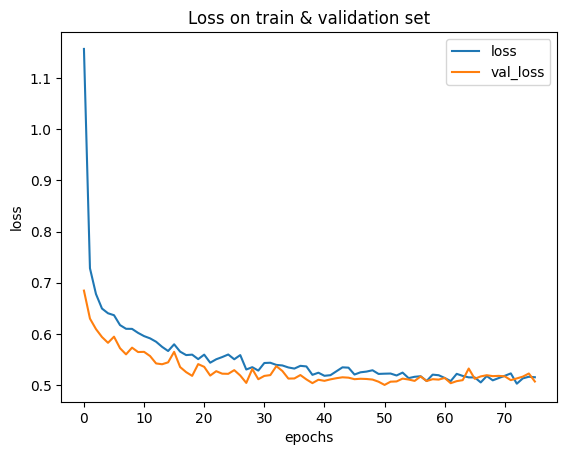

In [66]:
plt.figure(figsize = (7, 4))
dd_model_loss.plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss on train & validation set')
plt.show()

In [67]:
# Prediction on train data

y_train_predict_prob = dd_model.predict(X_train)

threshold = 0.50

y_train_predict = (y_train_predict_prob >= threshold).astype(int)
y_train_predict

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [68]:
# Confusion matrix on train set

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict))
cm_train

,0,1
0,1178,169
1,271,384


In [69]:
# Classification report on train data

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1347
           1       0.69      0.59      0.64       655

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.77      2002



In [70]:
# roc_auc_score on train data

roc_score_train = roc_auc_score(y_train, y_train_predict_prob)
print(f"roc_auc_score on train data : {roc_score_train}")

roc_auc_score on train data : 0.8174733787834998


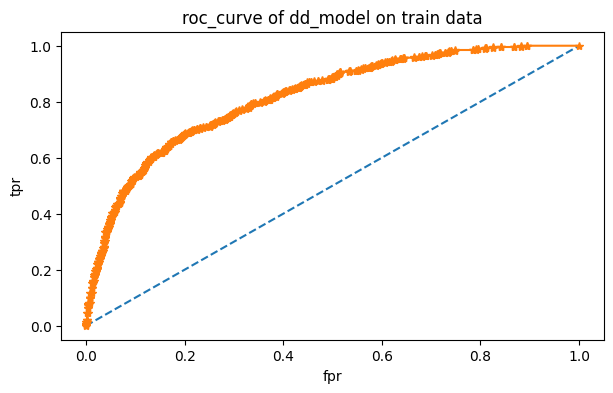

In [71]:
# roc curve on train data

fpr, tpr, threshold = roc_curve(y_train, y_train_predict_prob)

plt.figure(figsize = (7, 4))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve of dd_model on train data')
plt.show()

In [72]:
# Prediction on test data

y_test_predict_prob = dd_model.predict(X_test)

threshold = 0.50

y_test_predict = (y_test_predict_prob >= threshold).astype(int)
y_test_predict

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [73]:
# Confusion matrix on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict))
cm_test

,0,1
0,527,73
1,114,145


In [74]:
# Classification report on test data

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       600
           1       0.67      0.56      0.61       259

    accuracy                           0.78       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.78      0.78       859



In [75]:
# roc_auc_score on test data

roc_score_test = roc_auc_score(y_test, y_test_predict_prob)
print(f"roc_auc_score on test data : {roc_score_test}")

roc_auc_score on test data : 0.7909491634491634


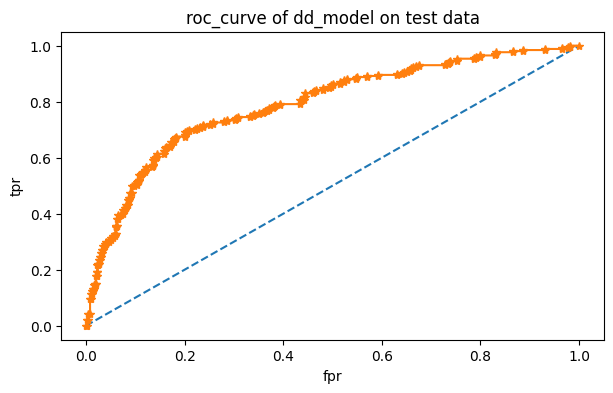

In [76]:
# roc curve on test data

fpr, tpr, threshold = roc_curve(y_test, y_test_predict_prob)

plt.figure(figsize = (7, 4))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve of dd_model on test data')
plt.show()

**Training Set Performance:**
1. The DeepLearning model achieves an accuracy of 0.78 on the training set.
2. Class 0 metrics are robust (precision=0.82, recall=0.87, F1-score=0.84), while Class 1 metrics are weak (precision=0.69, recall=0.59, F1-score=0.64).
3. The ROC AUC score is 0.82, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.78 .
2. Class 0 metrics are robust (precision=0.82, recall=0.88, F1-score=0.85), while class 1 metrics are weak (precision=0.67, recall=0.56, F1-score=0.61).
3. The ROC AUC score is 0.79, demonstrating almost strong predictive power.

**Analysis:** The DeepLearning  maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating potential challenges in handling imbalanced data.